# **Credit Risk Prediction**



## Introduction and Problem Statement

In the banking and financial sector, loan default is a major risk.  
This project aims to predict whether a loan applicant is likely to default or not based on various factors such as income, education, and loan amount.

The objective of this project is to build a machine learning model that can classify loan applicants as defaulters or non-defaulters using historical loan data.


## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Dataset**

In [ ]:
data=pd.read_csv('loan_prediction_dataset.csv')

## **Dataset Understanding and Description**

The dataset used in this project is the Loan Prediction Dataset obtained from Kaggle.
It contains information about loan applicants such as 'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Loan_Approved'.

The target variable is `Loan_Approved`, where:
- 1 indicates the loan was approved (non-default)
- 0 indicates the loan was not approved (default)


In [ ]:
data.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Loan_Approved
0,56,81788,334,15022,48,Employed,0
1,69,102879,781,21013,24,Self-Employed,1
2,46,58827,779,39687,60,Self-Employed,0
3,32,127188,364,16886,24,Unemployed,0
4,60,25655,307,26256,36,Unemployed,0


In [ ]:
data.columns

Index(['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Loan_Approved'],
      dtype='object')

In [ ]:
data.describe()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Loan_Approved
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,43.805500,84533.585000,577.055000,25460.315000,35.47800,0.171000
std,14.929203,37771.169751,157.525951,14116.737774,16.98587,0.376603
min,18.000000,20155.000000,300.000000,1060.000000,12.00000,0.000000
25%,31.000000,50925.250000,440.000000,13444.250000,24.00000,0.000000
50%,44.000000,84073.500000,578.500000,25446.000000,36.00000,0.000000
75%,56.000000,117523.250000,715.250000,37949.250000,48.00000,0.000000
max,69.000000,149992.000000,849.000000,49994.000000,60.00000,1.000000


In [ ]:
data.shape

(2000, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2000 non-null   int64 
 1   Income             2000 non-null   int64 
 2   Credit_Score       2000 non-null   int64 
 3   Loan_Amount        2000 non-null   int64 
 4   Loan_Term          2000 non-null   int64 
 5   Employment_Status  2000 non-null   object
 6   Loan_Approved      2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


In [ ]:
data.isnull().sum()

,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Employment_Status,0
Loan_Approved,0


In [ ]:
data.nunique()


,0
Age,52
Income,1978
Credit_Score,532
Loan_Amount,1968
Loan_Term,5
Employment_Status,3
Loan_Approved,2


In [ ]:
data.dtypes

,0
Age,int64
Income,int64
Credit_Score,int64
Loan_Amount,int64
Loan_Term,int64
Employment_Status,object
Loan_Approved,int64


## **Data Cleaning and Preparation**

The dataset contains missing values and categorical variables.
Missing values were handled using appropriate methods such as filling with mean or mode.
Categorical variables were converted into numerical format using one-hot encoding.
The data was then split into features and target variables for model training.


# Applying One Hot Encoding step in Employment Status

In [ ]:
data=pd.get_dummies(data,columns=['Employment_Status'],drop_first=True)

# Perpare features and Target

In [ ]:
x = data.drop('Loan_Approved', axis=1) # whole dataset except loan approved row

In [ ]:
y = data['Loan_Approved'] #loan approved row

# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,    # features define
    test_size=0.2,  # test ratio 20%
    random_state=42   # to fix the spliting of data always
)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1600, 7) (400, 7)
(1600,) (400,)


# **Model Training and Testing**

We are using a Logistic Regression model is used for this project as it is suitable for binary classification problems.
The dataset was split into training and testing sets.
The model was trained using the training data and tested on unseen test data.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
model = LogisticRegression(max_iter=1000) # applying model use max_iter to avoid convergence error

In [23]:
model.fit(x_train,y_train) # train the model

LogisticRegression(max_iter=1000)

# Predict the model

In [24]:
y_pred=model.predict(x_test)

# **Evaluation Metrics**

The performance of the model was evaluated using accuracy score and confusion matrix.
Accuracy measures the overall correctness of the model, while the confusion matrix provides detailed insight into correct and incorrect predictions.


# Calculate accuracy

In [27]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy =", accuracy)

Accuracy = 0.915


# Create confusion matrix

In [28]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[311  11]
 [ 23  55]]


# Visulization by heatmap

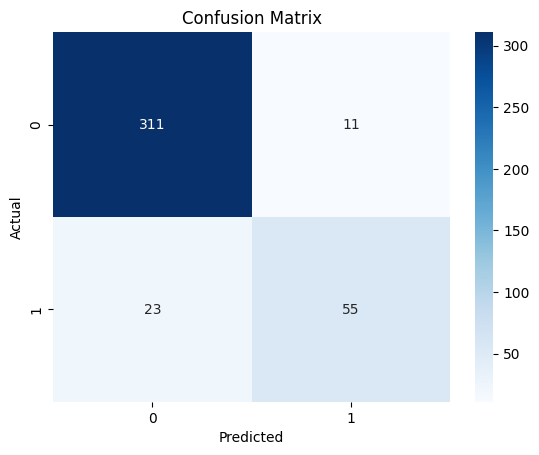

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion**

In this project, a Logistic Regression model was developed to predict loan default risk.
Data cleaning and exploratory data analysis helped in understanding key features affecting loan approval.
The model achieved a good accuracy and demonstrated its ability to classify loan applicants effectively.
This model can assist financial institutions in making informed lending decisions.
